In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

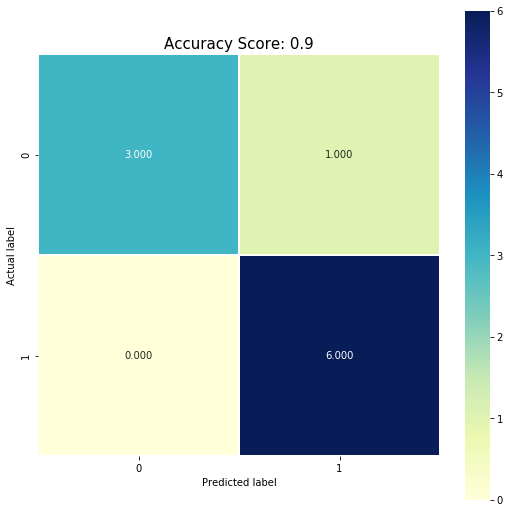

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)


from sklearn import metrics
cm = metrics.confusion_matrix(y, model.predict(x))
score = model.score(x, y)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


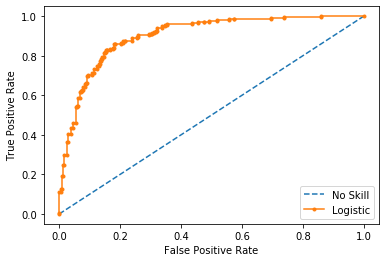

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# generate 2 class dataset
x2, y2 = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainx, testx, trainy, testy = train_test_split(x2, y2, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# predict probabilities
lr_probs = model.predict_proba(testx)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

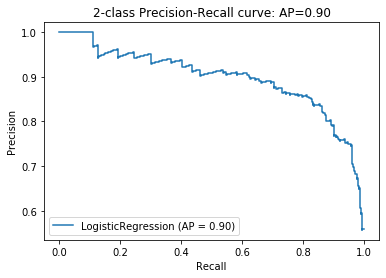

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

scorey = model.decision_function(testx)

average_precision = average_precision_score(testy, scorey)



disp = plot_precision_recall_curve(model, testx, testy)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Linear regression 
x = np.random.rand(100, 1)   # generate random data of 100 samples
y = - 3 * x + 5 + np.random.rand(100, 1)   # randomly generated samples are offset and multiplied

# Linear Regression Model initialization
regress_model = LinearRegression()

# Fit the data(train the model)
regress_model.fit(x, y)

# Predict
y_pred = regress_model.predict(x)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print('The MAE is: %f,:' % mae)
print('The MSE is: %f,:' % mse)
print('The RMSE is: %f,:' % rmse)

The MAE is: 0.259051,:
The MSE is: 0.087223,:
The RMSE is: 0.295336,:
